<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 


## CS6501  Machine Learning and Applications
## SEM1 2022/3

### CS6501 Etivity 1 - Data Preprocessing and Training a Machine Learning Model

### Instructor: Emil Vassev
Sept 13th, 2022
<br><br>
Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: <span style="color:red"> KAUSTUBH</span>
### Student Surname: <span style="color:red"> KENI</span>
### Student ID: <span style="color:red"> 22175342</span>
### Date of Final Submission: <span style="color:red"> 16/10/2022</span>
***

## Introduction
Real-world datasets for ML are expected to be *incomplete*, *inconsistent*, and *noisy* due to their heterogeneous origin. Applying ML algorithms on such data would not give quality results as they would fail to identify patterns effectively.

**Data Preprocessing** is a part of the ML process, which strives to improve the overall data quality by dealing with:
* duplicate or missing values - such data may give an incorrect view of the overall statistics of data;
* outliers and inconsistent data points - such data often tend to disturb the model’s overall learning and thus, leading to false predictions.

Data Preprocessing targets ML features, which are:
* individual independent variables operating as inputs to ML models;
* representations or attributes that describe the data and help the models to predict the classes/labels.

Example: features in a structured dataset (e.g., in a CSV format) refer to each column representing a measurable piece of data that can be used for analysis: name, age, sex, fare, etc.

**Model Training** is a primary step in ML in which a ML algorithm is fed with sufficient training data to learn from. Model Training results in a working ML model that can then be validated, tested and deployed.

### The Dataset

The provided dataset covers bond trading operations (buy and sell) on a financial market. The data is labeled and provided in its raw format, so it needs to be preprocessed.

The provided dataset can be loaded as following:

### Task
In this e-tivity, you are asked to follow the ML process to:

* preprocess a provided dataset, so it will become suitable for ML operations;
* select an appropriate ML model, so it will cope with the specifics of data and ML tasks;
* train the selected ML model on the preprocessed dataset;
* test the selected ML model on the preprocessed dataset.

In [38]:
import pandas as pd
import numpy as np

url_dataset = "https://raw.githubusercontent.com/evassev/CS6501_SEM2_2022/main/Etivities/data/trade_combined.csv"
df = pd.read_csv(url_dataset)

df.head(10)

,NoRelatedSym,Symbol,SymbolSfx,SecurityID,SecurityIDSource,SecurityType,MaturityDate,IssueDate,Side,OrderQty,...,NoPartIDs,PartyID,DealerID,DealerTraderID,CustomerTraderID,CustomerID,PartyIDSource,PartyRole,DealerCount,OrdSubType
0,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,334,10792.0,6549,129,D,13,5,OUTRIGHT
1,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,335,117793.0,6549,129,D,13,5,OUTRIGHT
2,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,325,119290.0,6549,129,D,13,5,OUTRIGHT
3,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,327,113852.0,6549,129,D,13,5,OUTRIGHT
4,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,337,117795.0,6549,129,D,13,5,OUTRIGHT
5,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,325,119752.0,7019,277,D,13,4,OUTRIGHT
6,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,336,117794.0,7019,277,D,13,4,OUTRIGHT
7,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,323,117786.0,7019,277,D,13,4,OUTRIGHT
8,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,337,117795.0,7019,277,D,13,4,OUTRIGHT
9,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,SELL,600000,...,1,1,335,117793.0,11532,177,D,13,4,OUTRIGHT


 ### Step 1: Determine the ML Model: Supervised-Classification, Supervised-Regression, or Unsupervised ML Model.
 
The problem statement indicates that a <b>Supervised-Regression</b> model is required since the target variable is continuous.
 


####  ML model which can predict the Bond Price.

Target Variable: Price

### Step 2: Data Preprocessing.

### Step 2.1: Specifics of the dataset.

* shape
* columns (features)
* data types
* statistics for the 'Price' feature
* plot the 'Price' feature

In [39]:
# shape

df.shape

(20000, 27)

In [40]:
# columns (features)

# For finding the list of columns in the data
df.columns

Index(['NoRelatedSym', 'Symbol', 'SymbolSfx', 'SecurityID', 'SecurityIDSource',
       'SecurityType', 'MaturityDate', 'IssueDate', 'Side', 'OrderQty',
       'SettlDate', 'Currency', 'OrdType', 'TransactTime', 'Price',
       'PriceType', 'Yield', 'NoPartIDs', 'PartyID', 'DealerID',
       'DealerTraderID', 'CustomerTraderID', 'CustomerID', 'PartyIDSource',
       'PartyRole', 'DealerCount', 'OrdSubType'],
      dtype='object')

In [41]:
# data types

df.dtypes

NoRelatedSym          int64
Symbol               object
SymbolSfx            object
SecurityID          float64
SecurityIDSource      int64
SecurityType         object
MaturityDate         object
IssueDate            object
Side                 object
OrderQty              int64
SettlDate            object
Currency             object
OrdType               int64
TransactTime         object
Price               float64
PriceType             int64
Yield               float64
NoPartIDs             int64
PartyID               int64
DealerID              int64
DealerTraderID      float64
CustomerTraderID      int64
CustomerID            int64
PartyIDSource        object
PartyRole             int64
DealerCount           int64
OrdSubType           object
dtype: object

In [42]:
# statistics for the 'Price' feature
df['Price'].describe()

count    18692.000000
mean       107.535666
std         14.445474
min          0.000000
25%         99.749750
50%        103.324500
75%        110.360500
max        174.278000
Name: Price, dtype: float64

<AxesSubplot:>

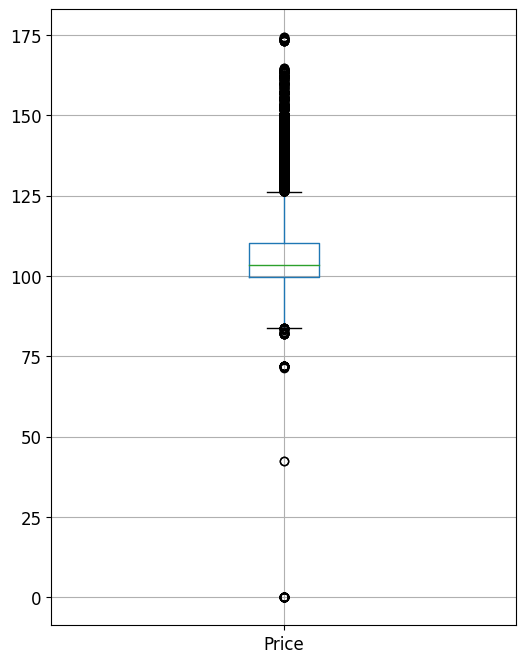

In [43]:
# plot the 'Price' feature
df.boxplot(column='Price',grid=True,fontsize=12,figsize=(6,8))

### Step 2.2: Data Cleaning: Remove features with unique values for each row in the dataset.

* Show the features with unique values for each row in the dataset.
* Remove the features with unique values for each row in the dataset.

In [44]:
# To the unique values in the dataset
# In order to determine which columns are categorical and which are continuous
df.nunique()

NoRelatedSym            1
Symbol                411
SymbolSfx               1
SecurityID           1912
SecurityIDSource        1
SecurityType            4
MaturityDate          311
IssueDate             402
Side                    2
OrderQty             1249
SettlDate              99
Currency                1
OrdType                 1
TransactTime         4130
Price               12112
PriceType               1
Yield                3287
NoPartIDs               1
PartyID                 1
DealerID               14
DealerTraderID        160
CustomerTraderID      389
CustomerID            170
PartyIDSource           1
PartyRole               1
DealerCount             5
OrdSubType              1
dtype: int64

In [45]:
# Removing the features with unique values for each row in the dataset.
for column in df.columns:
    uniquevalues=df[column].unique()
    if len(uniquevalues)==df.shape[0]:
        df.drop(column,axis=1,inplace=True)
        print("Column'"+column+"'has been removed")

### Step 2.3: Data Cleaning: Remove features with one unique value for the entire dataset.

* Show the features with one unique value for the entire dataset.
* Remove the features with one unique value for the entire dataset.

In [46]:
for column1 in df.columns:
    uniquevalues=df[column1].unique()
    if len(uniquevalues)==1:
        df.drop(column1,axis=1, inplace=True)
        print("Column'"+column1+"'has been removed")

Column'NoRelatedSym'has been removed
Column'SymbolSfx'has been removed
Column'SecurityIDSource'has been removed
Column'Currency'has been removed
Column'OrdType'has been removed
Column'PriceType'has been removed
Column'NoPartIDs'has been removed
Column'PartyID'has been removed
Column'PartyIDSource'has been removed
Column'PartyRole'has been removed
Column'OrdSubType'has been removed


### Step 2.4: Data Cleaning: Remove records with null (NAN) values.

* Show the number of null values per feature.
* For any feature, remove the rows containg a null value

In [47]:
for column in df.columns:
    print(df[column].isnull().sum())
for column in df.columns:
    df=df[df[column].notna()]

0
13959
0
0
0
0
0
0
0
1308
1297
0
1055
0
0
0


In [48]:
# Finding how many missing values are there for each column
df.isnull().sum()

Symbol              0
SecurityID          0
SecurityType        0
MaturityDate        0
IssueDate           0
Side                0
OrderQty            0
SettlDate           0
TransactTime        0
Price               0
Yield               0
DealerID            0
DealerTraderID      0
CustomerTraderID    0
CustomerID          0
DealerCount         0
dtype: int64

### Step 2.5: Data Transformation: Convert all non-numeric features to numeric.

* Show all non-numeric features.
* Convert the non-numeric features to numeric.

In [70]:
no=df.select_dtypes(exclude=np.number).columns.tolist()
print(no)
df['MaturityDate']=pd.to_datetime(df['MaturityDate']).dt.strftime("%Y%m%d").astype(int)
df['IssueDate']=pd.to_datetime(df['IssueDate']).dt.strftime("%Y%m%d").astype(int)
df['SettlDate']=pd.to_datetime(df['SettlDate']).dt.strftime("%Y%m%d").astype(int)
df['TransactTime']=pd.to_datetime(df['TransactTime']).dt.strftime("%Y%m%d").astype(int)
class_mapper={'BUY':1,'SELL':2}
df['Side']=df['Side'].replace(class_mapper)
security_type=df['SecurityType'].unique()
print(security_type)
class_mapper = {}
num=0
for element in security_type:
    num +=1
    class_mapper[element]=num
df['SecurityType']=df['SecurityType'].replace(class_mapper)


symbol_type=df['Symbol'].unique()
print(symbol_type)
class_map={}
num1=0
for el in symbol_type:
    num1 +=1
    class_map[el]=num1
df['Symbol']=df['Symbol'].replace(class_map)
print(df['Symbol'])

[]
[1 2 3]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244

### Step 3: Model Training and Testing.

### Step 3.1: Select and Import a ML Algorithm.

In [71]:
#for Supervised Regression ML use 'from sklearn.ensemble import RandomForestRegressor'


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X=df.loc[:,df.columns!='Price']
Y = df.iloc[:,9]

### Step 3.2: Train the ML Model. (10%)

* from the preprocessed dataset, extract 𝑋 - a dataset of all the features but 'Price'
* from the preprocessed dataset, extract 𝑌 - vector that contains all the values of 'Price'
* slice the dataset: 80% for training and 20% for testing
* create an instance of the selected ML algorithm and train

In [73]:
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
print(X_train)
print(Y_train)

       Symbol  SecurityID  SecurityType  MaturityDate  IssueDate  Side  \
10127      22    597209.0             3      19700101   19700101     1   
19160     272   2314777.0             1      19700101   19700101     1   
15917     184    273653.0             1      19700101   19700101     2   
14979       8    816003.0             1      19700101   19700101     2   
19814      65   2314913.0             1      19700101   19700101     2   
...       ...         ...           ...           ...        ...   ...   
19195     163   2314787.0             2      19700101   19700101     2   
15354      58   1076920.0             1      19700101   19700101     1   
9998       60    597156.0             1      19700101   19700101     2   
14653     103   1134363.0             1      19700101   19700101     1   
14794      31    815882.0             1      19700101   19700101     1   

       OrderQty  SettlDate  TransactTime  Yield  DealerID  DealerTraderID  \
10127      6000   19700101      19

### Step 3.3: Test the ML Model.

* use the testing part of the dataset to predic the Bond Prices
* compute and show the prediction score

In [74]:
rf_regressor = RandomForestRegressor (n_estimators=100)
rf_regressor.fit(X_train, Y_train)
Y_pred = rf_regressor.predict(X_test)
print(metrics.r2_score(Y_test,Y_pred))

0.9617193290041952
